###Importing library 


In [ ]:
#loading modules 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/grive')


Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
 
train = pd.read_csv('/content/grive/MyDrive/train_E1GspfA.csv')

###Basic overview 

In [ ]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
train.tail()

,date,hour,demand
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104
18246,2021-02-28,23,85


In [ ]:
train.shape

(18247, 3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [ ]:
train.isna().sum()

date      0
hour      0
demand    0
dtype: int64

In [ ]:
train["hour"].value_counts()

16    892
15    890
13    889
17    889
12    888
14    886
18    884
10    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64

In [ ]:
# FE Data so that we can get max information 
train['month'] = pd.to_datetime(train['date']).dt.month
train['year'] = pd.to_datetime(train['date']).dt.year
train['date1']=pd.to_datetime(train['date']).dt.day
train["week"]=pd.to_datetime(train['date']).dt.dayofweek


In [ ]:
train["year"].unique() # total 4 unique values 

array([2018, 2019, 2020, 2021])

In [ ]:
train["demand"].min(),train["demand"].max()

(1, 379)

In [ ]:
train['year'].value_counts() # more data from 2019 

2019    7286
2020    7145
2018    2511
2021    1305
Name: year, dtype: int64

In [ ]:
train

,date,hour,demand,month,year,date1,week
0,2018-08-18,9,91,8,2018,18,5
1,2018-08-18,10,21,8,2018,18,5
2,2018-08-18,13,23,8,2018,18,5
3,2018-08-18,14,104,8,2018,18,5
4,2018-08-18,15,81,8,2018,18,5
...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,2,2021,28,6
18243,2021-02-28,20,88,2,2021,28,6
18244,2021-02-28,21,39,2,2021,28,6
18245,2021-02-28,22,104,2,2021,28,6


In [ ]:
train.tail()

,date,hour,demand,month,year,date1,week
18242,2021-02-28,19,95,2,2021,28,6
18243,2021-02-28,20,88,2,2021,28,6
18244,2021-02-28,21,39,2,2021,28,6
18245,2021-02-28,22,104,2,2021,28,6
18246,2021-02-28,23,85,2,2021,28,6


##EDA

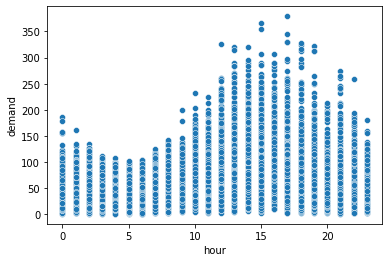

In [ ]:
# lets look at monthly trend 
sns.scatterplot(data=train,x='hour',y='demand')
# most demand for vechicle is at 3 pm , 
# demand for rental vechical will start from 10am-8pm 


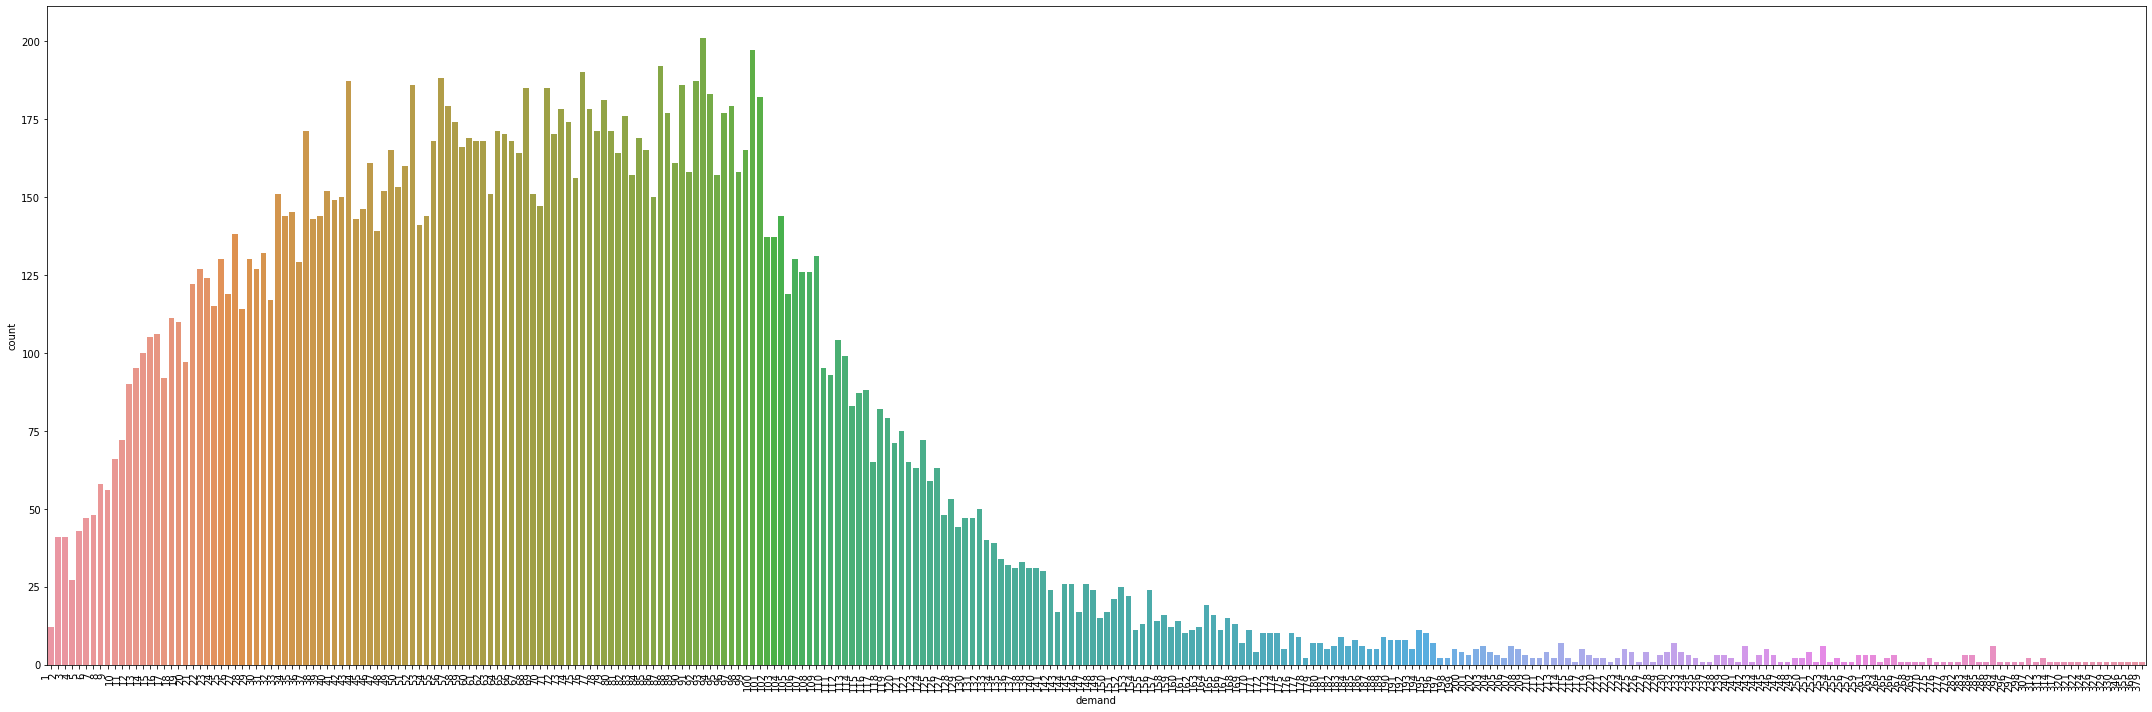

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x="demand", data=train)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
train["demand"].skew()

1.1284378365098429

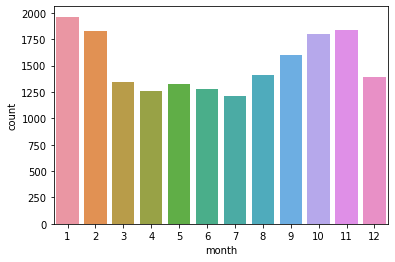

In [ ]:
sns.countplot(data=train,x="month")
# More demand for rental cars in months of january,feburary,October,and November.
# least demand in July month 

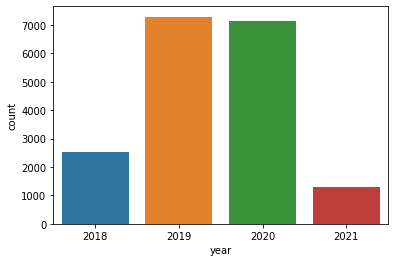

In [ ]:
sns.countplot(data=train,x="year")
#More demand has shot up in 2019 and 2020.

Text(0.5, 1.0, 'Frequency of demand in hours')

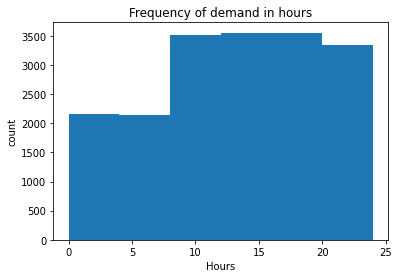

In [ ]:
plt.hist(train["hour"],bins=[0,4,8,12,16,20,24])
plt.xlabel("Hours")
plt.ylabel("count")
plt.title("Frequency of demand in hours")
# more demand for car is starting at 10 am to night 8pm 

In [ ]:
train["week"].value_counts()

4    2671
5    2657
6    2649
0    2589
2    2565
1    2564
3    2552
Name: week, dtype: int64

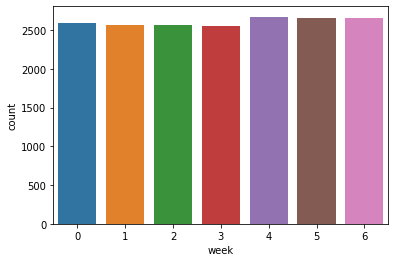

In [ ]:
sns.countplot(data=train,x="week")
#from monday to tuesday demand is almost same but on friday demand is more compared to rest of other days followed by thursday.
#day of the week with Monday=0, Sunday=6.

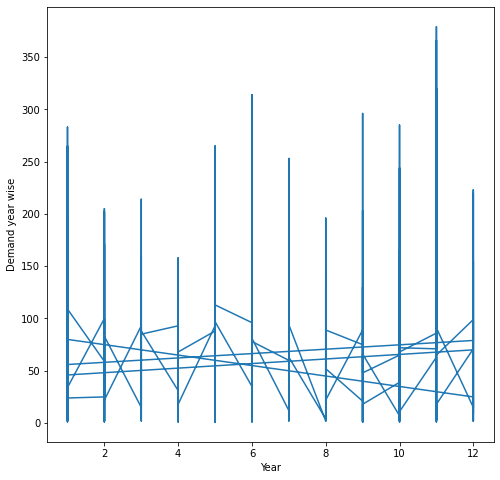

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(train["month"],train["demand"])
plt.xlabel("Year")
plt.ylabel("Demand year wise")

plt.show()
# looking at data in time series : data looks stationary 

#Summary
A.**observations**
    

1.   More demand for rental cars in months of january,feburary,October,and November.Least in july.
2.  More demand for car is starting at 10 am to night 8pm. And minimum at 12 am 
3. From monday to tuesday demand is almost same but on friday demand is more compared to rest of other days followed by thursday.
4.  More demand has shot up in 2019 and 2020.

B.**Wayforwards**


1.  Introducte new offer like 5-10% off per 1km in the month of july to increase revenue.
2.   Need to allocate more cars in the months of January ,feburary ,october to match with the supply.And also increase the Car collecting points areas.
3. Add some attractive offers on thurdays since its demand ranked at 2nd ,it can have potential to attract new customers and add more revenue to company.












In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
 3   month   18247 non-null  int64 
 4   year    18247 non-null  int64 
 5   date1   18247 non-null  int64 
 6   week    18247 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 998.0+ KB


In [ ]:
train1=train.drop(["date"],axis=1)

In [ ]:
train1.head()

,hour,demand,month,year,date1,week
0,9,91,8,2018,18,5
1,10,21,8,2018,18,5
2,13,23,8,2018,18,5
3,14,104,8,2018,18,5
4,15,81,8,2018,18,5


In [ ]:
train1.shape

(18247, 6)

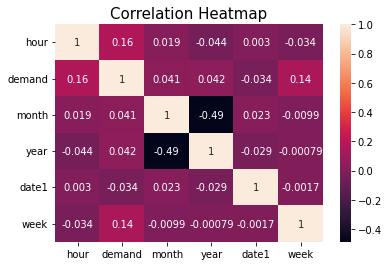

In [ ]:
sns.heatmap(train1.corr(),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

In [ ]:
# co-releation with respective to demand is more for: hour >year >month.

##Splitting data into train and test in a chronological order

In [ ]:
x=train1.drop(["demand"],axis=1)
y=train1["demand"]

In [ ]:
x.shape

(18247, 5)

In [ ]:
y.shape

(18247,)

In [ ]:
x.shape

(18247, 5)

In [ ]:
18247-3650

14597

In [ ]:
x_train ,x_valid =x[:14597],x[14597:]

In [ ]:
y_train,y_valid=y[:14597],y[14597:]

In [ ]:
x_train.shape , y_train.shape


((14597, 5), (14597,))

In [ ]:
x_valid.shape , y_valid.shape

((3650, 5), (3650,))

In [ ]:
# standardization of data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)


x_train = scaler.transform(x_train)
x_valid=scaler.transform(x_valid)

In [ ]:
x_train.shape,x_valid.shape

((14597, 5), (3650, 5))

###Machine learning models testing 

In [ ]:
#loading machine learning modules 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [ ]:
from math import sqrt


In [ ]:
# we will check for which model is better with rmse score .
svr= SVR()
lr = LinearRegression()
knn = KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [ ]:
from math import sqrt
  

In [ ]:
for i in [rf,svr, lr ,knn, dt]:
  i.fit(x_train, y_train)
  pred = i.predict(x_valid)
  testscore = sqrt(mean_squared_error(y_valid,pred))
  trainscore= sqrt(mean_squared_error(y_train,i.predict(x_train)))
  if abs(trainscore - testscore) <= 8:
    print("*"*50)
    print(i)
    print('root mean square error',sqrt(mean_squared_error(y_valid,pred)))
    print('r 2 score',r2_score(y_valid,pred))
    print(' train error with rmse score: ',sqrt(mean_squared_error(y_train,i.predict(x_train))))
    print('r2 for train data',r2_score(y_train,i.predict(x_train)))
    print('*'*50)
  else:
    print("error is large")

error is large
**************************************************
SVR()
root mean square error 42.999367292676695
r 2 score 0.08926224855736875
 train error with rmse score:  37.51402735469824
r2 for train data 0.14974281825517444
**************************************************
**************************************************
LinearRegression()
root mean square error 43.824465046405265
r 2 score 0.0539753438444881
 train error with rmse score:  39.63079434417014
r2 for train data 0.05108244340718704
**************************************************
error is large
error is large


##XGBBOOST

In [ ]:
#loading XGBboost
from xgboost import XGBRegressor

In [ ]:
#assigning XBGboost 
xg_reg= XGBRegressor() 

In [ ]:
#fitting train data to xg
xg_reg.fit(x_train,y_train)

[08:06:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#predicting it on x_valid to know xg rmse score later we will hyper tune it
y_pred_xg=xg_reg.predict(x_valid)

In [ ]:
print('root mean square error',sqrt(mean_squared_error(y_pred_xg,y_valid)))

root mean square error 37.587497001282905


In [ ]:
#checking for cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
#assigngnin objective with squared error .
model =XGBRegressor(objective="reg:squarederror")

In [ ]:
scores_xg=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=8)

In [ ]:
scores_xg

array([-1628.28451198, -1033.31008462, -1018.817202  , -1317.09366012,
       -2044.83047545, -1144.01545606,  -985.43660273, -1291.78615592])

In [ ]:
rmse=np.sqrt(-scores_xg) # RMSE  error.

In [ ]:
rmse

array([40.35200753, 32.14514092, 31.91891605, 36.29178502, 45.21980181,
       33.82329753, 31.39166454, 35.94142674])

## Machine learning models selection:

<p>Based on RMSE score we are able to come down to this models.<p>
1.   Linear regression 
2.   XGBBOOSt



###Hyper parametertunning XGBboost

In [ ]:
xg_reg= XGBRegressor()

In [ ]:
# hyper tuning maxdepth and minchild weight
max_depth=[3,5,7,10]
min_child_weight=[1,2,6,100]

for i in max_depth:
  for j in min_child_weight:
    model_xg=XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=i, min_child_weight=j, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective="reg:squarederror", nthread=4, scale_pos_weight=1, seed=27)
    model.fit(x_train,y_train)
    y_pred_xg=model.predict(x_valid)
    print("maxdepth",i)
    print("minchildweight",j)
    print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred_xg,y_valid)))


# RMSE value is same for all the values given,

maxdepth 3
minchildweight 1
Root mean square error for i is: 37.587497001282905
maxdepth 3
minchildweight 2
Root mean square error for i is: 37.587497001282905
maxdepth 3
minchildweight 6
Root mean square error for i is: 37.587497001282905
maxdepth 3
minchildweight 100
Root mean square error for i is: 37.587497001282905
maxdepth 5
minchildweight 1
Root mean square error for i is: 37.587497001282905
maxdepth 5
minchildweight 2
Root mean square error for i is: 37.587497001282905
maxdepth 5
minchildweight 6
Root mean square error for i is: 37.587497001282905
maxdepth 5
minchildweight 100
Root mean square error for i is: 37.587497001282905
maxdepth 7
minchildweight 1
Root mean square error for i is: 37.587497001282905
maxdepth 7
minchildweight 2
Root mean square error for i is: 37.587497001282905
maxdepth 7
minchildweight 6
Root mean square error for i is: 37.587497001282905
maxdepth 7
minchildweight 100
Root mean square error for i is: 37.587497001282905
maxdepth 10
minchildweight 1
Root 

In [ ]:
 # assigned with out previous hyper parameters 

model_xg=XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3, min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective="reg:squarederror", nthread=4, scale_pos_weight=1, seed=27)

In [ ]:
# predicting it on x_valid data 

y_pred_xg=model.predict(x_valid)
print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred_xg,y_valid)))

Root mean square error for i is: 37.587497001282905


In [ ]:
# hyper tunning gama value

gamma =[0,0.01,0.001,1,2,3]
for i in gamma:
  model_xg=XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3, min_child_weight=2, gamma=i, subsample=0.8, colsample_bytree=0.8,
             objective="reg:squarederror", nthread=4, scale_pos_weight=1, seed=27)
  model_xg.fit(x_train,y_train)
  y_pred_xg=model_xg.predict(x_valid)
  print("gamma",i)
  print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred_xg,y_valid)))
 
 # for given all gamma values RMSE values has decreased bit when compared to previous parameters. choosing 1 which is default parameter

gamma 0
Root mean square error for i is: 37.475210927557406
gamma 0.01
Root mean square error for i is: 37.475210927557406
gamma 0.001
Root mean square error for i is: 37.475210927557406
gamma 1
Root mean square error for i is: 37.475210927557406
gamma 2
Root mean square error for i is: 37.475210927557406
gamma 3
Root mean square error for i is: 37.475210927557406


In [ ]:
# hyper parameter tunning:

learning_rate =[0.1,0.01,0.0001,0.00001]
for i in learning_rate:
  model_xg=XGBRegressor( learning_rate =i, n_estimators=140, max_depth=3, min_child_weight=2, gamma=1, subsample=0.8, colsample_bytree=0.8,
             objective="reg:squarederror", nthread=4, scale_pos_weight=1, seed=27)
  model_xg.fit(x_train,y_train)
  y_pred_xg=model_xg.predict(x_valid)
  print("learning rate:",i)
  print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred_xg,y_valid)))
   
# learning rate =0.1 is good 


learning rate: 0.1
Root mean square error for i is: 37.475210927557406
learning rate: 0.01
Root mean square error for i is: 47.13115909416437
learning rate: 0.0001
Root mean square error for i is: 89.81377954637712
learning rate: 1e-05
Root mean square error for i is: 90.62609964223775


In [ ]:
# final XBG boost model with our hyper parameter 
model_xg=XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3,gamma=1, min_child_weight=2,subsample=0.8, colsample_bytree=0.8,
             objective="reg:squarederror", nthread=4, scale_pos_weight=1, seed=27)
model_xg.fit(x_train,y_train)
y_pred_xg=model_xg.predict(x_valid)

print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred_xg,y_valid)))

Root mean square error for i is: 37.475210927557406


###XBBOOST on test data

In [ ]:
#loading test data 
test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv')

In [ ]:
# FE on test data 
test['month'] = pd.to_datetime(test['date']).dt.month
test['year'] = pd.to_datetime(test['date']).dt.year
test['date1']=pd.to_datetime(test['date']).dt.day
test["week"]=pd.to_datetime(test['date']).dt.dayofweek

In [ ]:
test1=test.drop(["date"],axis=1)
test1.shape

(7650, 5)

In [ ]:
test1

,hour,month,year,date1,week
0,0,3,2021,1,0
1,1,3,2021,1,0
2,2,3,2021,1,0
3,3,3,2021,1,0
4,5,3,2021,1,0
...,...,...,...,...,...
7645,19,3,2022,28,0
7646,20,3,2022,28,0
7647,21,3,2022,28,0
7648,22,3,2022,28,0


In [ ]:
from sklearn.preprocessing import StandardScaler # standardization of data 

test1=scaler.transform(test1)

In [ ]:
# fitting test data on xgboost model.
pred = model_xg.predict(test1)

In [ ]:
k=pred # output values 

In [ ]:
k

array([58.01001 , 55.95492 , 57.558285, ..., 73.40332 , 69.65928 ,
       63.914894], dtype=float32)

In [ ]:
demand=pd.DataFrame(k,columns=["outputprediction"]) # converting it into dataframe

In [ ]:
test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv')  # loading test data

In [ ]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [ ]:
test.isna().sum()

date    0
hour    0
dtype: int64

In [ ]:
test["demand"]=demand #adding demand colum to test data 

In [ ]:
test.head()

,date,hour,demand
0,2021-03-01,0,58.010010
1,2021-03-01,1,55.954922
2,2021-03-01,2,57.558285
3,2021-03-01,3,57.174892
4,2021-03-01,5,56.235600


In [ ]:
test['demand']=test["demand"].apply(lambda x:round(x))  # round of values .

In [ ]:
test.head()

,date,hour,demand
0,2021-03-01,0,58
1,2021-03-01,1,56
2,2021-03-01,2,58
3,2021-03-01,3,57
4,2021-03-01,5,56


In [ ]:
df=test.set_index("date") # formatting data as requried 

In [ ]:
df.head()

,hour,demand
date,,
2021-03-01,0,58
2021-03-01,1,56
2021-03-01,2,58
2021-03-01,3,57
2021-03-01,5,56


In [ ]:
df.to_csv('/content/grive/MyDrive/xgboostwithskewed_round.csv')

###Hyper tuning our model (Linear regression) 

In [ ]:
# loading modules 
from sklearn.linear_model import LinearRegression,Ridge, ElasticNet, Lasso

In [ ]:
x_valid.shape , y_valid.shape

((3650, 5), (3650,))

In [ ]:
#  l-1 regularization hyper parameter tunning 

listnumbers=[-1,0.0001,0.001,0.1,0,1,2]
for i in listnumbers:
  lr_l1 = Lasso(alpha=i)
  lr_l1.fit(x_train, y_train)
  y_pred=lr_l1.predict(x_valid)
  print(i)
  print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred,y_valid)))

-1
Root mean square error for i is: 43.67163478050024
0.0001
Root mean square error for i is: 43.82450650471289
0.001
Root mean square error for i is: 43.82487965919299
0.1
Root mean square error for i is: 43.86840528187508
0
Root mean square error for i is: 43.824465046405265
1
Root mean square error for i is: 44.43697910577949
2
Root mean square error for i is: 44.57884076227208


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.530e+07, tolerance: 2.416e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

In [ ]:
# L-2 regularisation hyper paraeter tunning 

list_l2=[0,0.0001,0.001,0.01,0,1,2,5,7,9,0.00000001]
for i in list_l2:
  lr_l2 = Ridge(alpha=i)
  lr_l2.fit(x_train, y_train)
  y_pred_l2=lr_l2.predict(x_valid)
  print(i)
  print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred_l2,y_valid)))

0
Root mean square error for i is: 43.824465046405265
0.0001
Root mean square error for i is: 43.82446505462312
0.001
Root mean square error for i is: 43.824465128583725
0.01
Root mean square error for i is: 43.824465868189726
0
Root mean square error for i is: 43.824465046405265
1
Root mean square error for i is: 43.82454722391092
2
Root mean square error for i is: 43.82462939951319
5
Root mean square error for i is: 43.8248759148396
7
Root mean square error for i is: 43.82504024876355
9
Root mean square error for i is: 43.82520457493004
1e-08
Root mean square error for i is: 43.8244650464061


In [ ]:
# L-1 and L-2 regularisation hyper parameter tunning.

alpha=[0.00001,0.0001,0.001,0.01,0.1,0,1,2,5,6,8,10,12]
l1ratio=[0.00005,0.0005,0.005,0.05,0.5,0,1,2,5,6,8,10,12]
for i in alpha:
  for j in l1ratio:
    lr_el = ElasticNet(alpha=1.0,l1_ratio=0.5)
    lr_el.fit(x_train, y_train)
    y_pred_el=lr_el.predict(x_valid)
    print("aplha:",i)
    print("l1ratio:",j)
    print("Root mean square error for i is:",sqrt(mean_squared_error(y_pred_el,y_valid)))

aplha: 1e-05
l1ratio: 5e-05
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 0.0005
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 0.005
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 0.05
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 0.5
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 0
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 1
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 2
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 5
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 6
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 8
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 10
Root mean square error for i is: 44.49363148532595
aplha: 1e-05
l1ratio: 12
Root mean square error for i is: 44.49363148532595
aplha

In [ ]:
# so we choose ridge regression as it's showing less RMSE value.

In [ ]:
# final Linear regression with alpha 0.001 value final linear regresssion model.

lr_l2 = Ridge(alpha=0.001)
lr_l2.fit(x_train,y_train)
pred = lr_l2.predict(x_valid)
testscore = sqrt(mean_squared_error(y_valid,pred))
print(testscore)

43.824465128583725


In [ ]:
pred.shape

(3650,)

In [ ]:
# for lasso for -1 we got  low RMSE score
lr_l1 = Lasso(alpha=-1)
lr_l1.fit(x_train,y_train)
pred_l = lr_l1.predict(x_valid)
testscore = sqrt(mean_squared_error(y_valid,pred_l))
print(testscore)

43.67163478050024


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.530e+07, tolerance: 2.416e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### Linear regresssion with test data

In [ ]:
#loading test data
test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv')

In [ ]:
test.shape

(7650, 2)

In [ ]:
#FE on  test data 
test['month'] = pd.to_datetime(test['date']).dt.month
test['year'] = pd.to_datetime(test['date']).dt.year
test['date1']=pd.to_datetime(test['date']).dt.day
test["week"]=pd.to_datetime(test['date']).dt.dayofweek

In [ ]:
test1=test.drop(["date"],axis=1)
test1.shape

(7650, 5)

In [ ]:
# using ridge we are predicting it (l-2 )
pred = lr_l2.predict(test1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
pred.shape

(7650,)

In [ ]:
j=pred

In [ ]:
demand=pd.DataFrame(j,columns=["outputprediction"])

In [ ]:
demand  # output of test data 

,outputprediction
0,4554.787370
1,4561.595178
2,4568.402986
3,4575.210794
4,4588.826410
...,...
7645,4648.560970
7646,4655.368778
7647,4662.176586
7648,4668.984394


In [ ]:
test_final=test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv')

In [ ]:
test_final["demand"]=demand # adding demand value to test data

In [ ]:
test_final["demand"]=test_final["demand"].apply(lambda x:round(x))

In [ ]:
test_final.head()

,date,hour,demand
0,2021-03-01,0,4555
1,2021-03-01,1,4562
2,2021-03-01,2,4568
3,2021-03-01,3,4575
4,2021-03-01,5,4589


In [ ]:
df=test_final.set_index("date")

In [ ]:
df.head()

,hour,demand
date,,
2021-03-01,0,4555
2021-03-01,1,4562
2021-03-01,2,4568
2021-03-01,3,4575
2021-03-01,5,4589


In [ ]:
df.to_csv('/content/grive/MyDrive/linearregression.csv')

In [ ]:
# LASSO model ****************************************************************************************************************

In [ ]:
pred_l = lr_l1.predict(test1) # l1 regulrazation linear regression model.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
j=pred_l

In [ ]:
j

array([9408.09604115, 9415.98832443, 9423.88060772, ..., 9516.60835265,
       9524.50063593, 9532.39291922])

In [ ]:
demand=pd.DataFrame(j,columns=["outputprediction"])

In [ ]:
demand.head()

,outputprediction
0,9408.096041
1,9415.988324
2,9423.880608
3,9431.772891
4,9447.557458


In [ ]:
test_final=test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv')

In [ ]:
test_final["demand"]=demand

In [ ]:
test_final["demand"]=test_final["demand"].apply(lambda x:round(x))

In [ ]:
test_final.head()

,date,hour,demand
0,2021-03-01,0,9408
1,2021-03-01,1,9416
2,2021-03-01,2,9424
3,2021-03-01,3,9432
4,2021-03-01,5,9448


In [ ]:
df=test_final.set_index("date")

In [ ]:
df.to_csv('/content/grive/MyDrive/lasso.csv')

In [ ]:
df.head()

,hour,demand
date,,
2021-03-01,0,9408
2021-03-01,1,9416
2021-03-01,2,9424
2021-03-01,3,9432
2021-03-01,5,9448


In [ ]:
# Final RMSE SCORES:


In [ ]:
col=x_train.shape[1] # columns number

##DNN 

In [ ]:
#loading modules for deep learning 
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten


In [ ]:
# creating our neural network layers 

def regression():
  model = Sequential()
  model.add(Dense(80,activation='relu',input_shape=(col,)))
  #model.add(Dense(100,activation='relu'))
  
  

  model.add(Dense(1))

  model.compile(optimizer="adam",loss="mean_squared_error")

  return model

# after hyper tunning we are able to get a dense layer of 80 for this problem with good rmse score.

In [ ]:
model_dnn = regression()

In [ ]:
# fitting our model with train data & for 150 epochs.we are able to get a good rmse score after tunning it.
model_dnn.fit(x_train,y_train,validation_split=0.2,epochs=150,verbose=2)

Epoch 1/150
365/365 - 1s - loss: 5751.4141 - val_loss: 5183.6738 - 1s/epoch - 4ms/step
Epoch 2/150
365/365 - 1s - loss: 2762.0889 - val_loss: 2401.8662 - 592ms/epoch - 2ms/step
Epoch 3/150
365/365 - 1s - loss: 1787.0492 - val_loss: 1583.8007 - 615ms/epoch - 2ms/step
Epoch 4/150
365/365 - 1s - loss: 1682.8794 - val_loss: 1476.1125 - 635ms/epoch - 2ms/step
Epoch 5/150
365/365 - 1s - loss: 1646.5992 - val_loss: 1443.0769 - 640ms/epoch - 2ms/step
Epoch 6/150
365/365 - 1s - loss: 1620.1661 - val_loss: 1410.9457 - 567ms/epoch - 2ms/step
Epoch 7/150
365/365 - 1s - loss: 1590.8898 - val_loss: 1383.1128 - 598ms/epoch - 2ms/step
Epoch 8/150
365/365 - 1s - loss: 1557.7902 - val_loss: 1356.6554 - 556ms/epoch - 2ms/step
Epoch 9/150
365/365 - 1s - loss: 1530.8588 - val_loss: 1331.1149 - 626ms/epoch - 2ms/step
Epoch 10/150
365/365 - 1s - loss: 1509.0864 - val_loss: 1316.8204 - 567ms/epoch - 2ms/step
Epoch 11/150
365/365 - 1s - loss: 1493.4031 - val_loss: 1304.0699 - 617ms/epoch - 2ms/step
Epoch 12/15

In [ ]:
# fitting our validatation data
y = model_dnn.predict(x_valid)

In [ ]:
y # output

array([[49.72172],
       [51.69488],
       [54.36572],
       ...,
       [84.62538],
       [79.11505],
       [73.64997]], dtype=float32)

In [ ]:
loss_dnn=mean_squared_error(y,y_valid) # calculating mean squared error

In [ ]:
import math 
math.sqrt(loss_dnn) # for 160 eophs 

38.70442025947229

In [ ]:
# for 150 epochs 38.58380867087268
 # for 100 eophs 39.09979115059641
 # for 200 epochs 39.30247768232674

##DNN on test data

In [ ]:
test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv')

In [ ]:
test.shape

(7650, 2)

In [ ]:
# FE on test data 

test['month'] = pd.to_datetime(test['date']).dt.month
test['year'] = pd.to_datetime(test['date']).dt.year
test['date1']=pd.to_datetime(test['date']).dt.day
test["week"]=pd.to_datetime(test['date']).dt.dayofweek

In [ ]:
test1=test.drop(["date"],axis=1)
test1.shape

(7650, 5)

In [ ]:
test1=scaler.transform(test1) #normalization of ourtrain data 

In [ ]:
pred_dnn = model_dnn.predict(test1) # predicting model on test data.

In [ ]:
j2=pred_dnn

In [ ]:
demand=pd.DataFrame(j2,columns=["outputprediction"]) # output converted into data frame 

In [ ]:
test_final=test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv') # lodading test data 

In [ ]:
test_final["demand"]=demand

In [ ]:
test_final["demand"]=test_final["demand"].apply(lambda x:round(x))

In [ ]:
test_final.head()

,date,hour,demand
0,2021-03-01,0,49
1,2021-03-01,1,51
2,2021-03-01,2,53
3,2021-03-01,3,55
4,2021-03-01,5,60


In [ ]:
df=test_final.set_index("date") # setting data as per required format.

In [ ]:
df

,hour,demand
date,,
2021-03-01,0,49
2021-03-01,1,51
2021-03-01,2,53
2021-03-01,3,55
2021-03-01,5,60
...,...,...
2022-03-28,19,78
2022-03-28,20,75
2022-03-28,21,71


In [ ]:
df.to_csv('/content/grive/MyDrive/DNN_new.csv')

##Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# setting gradient booasting to squared error 
reg = GradientBoostingRegressor(random_state=0,criterion='squared_error')
reg.fit(x_train, y_train)

GradientBoostingRegressor(criterion='squared_error', random_state=0)

In [ ]:
y_reg=reg.predict(x_valid) # predicting it on validation data without hyper tunning

In [ ]:
loss_reg=mean_squared_error(y_reg,y_valid) # calculating squared loss 

In [ ]:
loss=sqrt(loss_reg)
loss          # RMSE loss 

37.58390963641146

##HYper parameter tunning of gradient boosting

In [ ]:
# hyper parameter tunning with nestimators .and checking for rmse loss.
n_estimators=[5,50,250,500,700,800,900]
for i in n_estimators:
  reg = GradientBoostingRegressor(random_state=0,criterion='squared_error',n_estimators=i)
  reg.fit(x_train, y_train)
  y_reg=reg.predict(x_valid)
  loss_reg=mean_squared_error(y_reg,y_valid)
  loss=sqrt(loss_reg)
  print(i)
  print("RMSE:",loss)

  #nestimator value 700 we lot low rmse score

5
RMSE: 42.806101378668465
50
RMSE: 38.294293101772496
250
RMSE: 37.2010624225084
500
RMSE: 37.13616195962469
700
RMSE: 37.12983198436382
800
RMSE: 37.16095071647598
900
RMSE: 37.19968586931624


In [ ]:
# hyper parameter tunning 

max_depth=[1,3,5,7,9]
for i in max_depth:
  reg = GradientBoostingRegressor(random_state=0,criterion='squared_error',n_estimators=700,max_depth=i)
  reg.fit(x_train, y_train)
  y_reg=reg.predict(x_valid)
  loss_reg=mean_squared_error(y_reg,y_valid)
  loss=sqrt(loss_reg)
  print(i)
  print("RMSE:",loss)

# for maxdepth of 3 rmse value is very less.

1
RMSE: 39.399734564242486
3
RMSE: 37.12983198436382
5
RMSE: 39.58752300914193
7
RMSE: 42.601736892645874
9
RMSE: 43.12845859736164


In [ ]:
# final gradient boosting with our hyper paramters 
reg = GradientBoostingRegressor(random_state=0,criterion='squared_error',n_estimators=700,max_depth=3)
reg.fit(x_train, y_train)
y_reg=reg.predict(x_valid)
loss_reg=mean_squared_error(y_reg,y_valid)
loss=sqrt(loss_reg)


In [ ]:
loss # rmse loss


37.12983198436382

##Gradient boosting on test data

In [ ]:
test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv') # loading test data

In [ ]:
test.shape

(7650, 2)

In [ ]:
#making test data similiar to train data
test['month'] = pd.to_datetime(test['date']).dt.month
test['year'] = pd.to_datetime(test['date']).dt.year
test['date1']=pd.to_datetime(test['date']).dt.day
test["week"]=pd.to_datetime(test['date']).dt.dayofweek 

In [ ]:
test1=test.drop(["date"],axis=1)
test1.shape

(7650, 5)

In [ ]:
test1=scaler.transform(test1) #normalization of our test data 

In [ ]:
y_reg=reg.predict(test1) # fitting test data to our model

In [ ]:
y_reg.shape

(7650,)

In [ ]:
y_reg

array([57.283905  , 51.75624222, 56.76450173, ..., 73.50817155,
       69.14049645, 63.99106388])

In [ ]:
j=y_reg

In [ ]:
demand=pd.DataFrame(j,columns=["outputprediction"]) # converting it into data frame

In [ ]:
test_final=test = pd.read_csv('/content/grive/MyDrive/test_6QvDdzb.csv')

In [ ]:
test_final["demand"]=demand

In [ ]:
test_final["demand"]=test_final["demand"].apply(lambda x:round(x)) # rounding of the values 

In [ ]:
test_final.head()

,date,hour,demand
0,2021-03-01,0,57
1,2021-03-01,1,52
2,2021-03-01,2,57
3,2021-03-01,3,59
4,2021-03-01,5,61


In [ ]:
df=test_final.set_index("date")

In [ ]:
df

,hour,demand
date,,
2021-03-01,0,57
2021-03-01,1,52
2021-03-01,2,57
2021-03-01,3,59
2021-03-01,5,61
...,...,...
2022-03-28,19,89
2022-03-28,20,80
2022-03-28,21,74


In [ ]:
df.to_csv('/content/grive/MyDrive/gradientboostingfinal12.csv')

## Final RMSE scores of our model on x_valid

1.   XGBBOOST : 37.475210927557406
2.   LINEAR REGRESSSION:<p>Lasso: 43.68976174561418<p>.<p2>Ridge:43.824465119715185<p2>
3.   DNN :39.09850907817783
4.   Gradient boosting regression : 37.12983198436382










In [ ]:
#Gradient boosting regression was good model among all for this data set with low rmse score.